In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

pd.pandas.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv('laptop_price.csv',encoding='latin-1')

In [3]:
df.shape


(1303, 13)

In [4]:
df.head(10)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
5,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.00
6,7,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,2139.97
7,8,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,1158.70
8,9,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,1495.00
9,10,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,770.00


In [5]:
df = df.drop(['laptop_ID', 'Product'], axis=1)

In [6]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
229,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD FirePro W4190M,Windows 10,1.9kg,1269.0
149,Acer,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4GB,1TB HDD,Intel HD Graphics 520,Windows 10,2.1kg,447.0
99,HP,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,12GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.62kg,1249.0
716,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7300U 2.6GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.9kg,1179.0
485,Lenovo,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.75kg,1049.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price_euros       1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [8]:
df.describe()

,Inches,Price_euros
count,1303.000000,1303.000000
mean,15.017191,1123.686992
std,1.426304,699.009043
min,10.100000,174.000000
25%,14.000000,599.000000
50%,15.600000,977.000000
75%,15.600000,1487.880000
max,18.400000,6099.000000


In [9]:
df['Company'].value_counts()


Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Vero           4
Xiaomi         4
Chuwi          3
Fujitsu        3
Google         3
LG             3
Huawei         2
Name: count, dtype: int64

# One Hot Encoded Company and Typename Column 


In [10]:
counts = df['Company'].value_counts()
threshold = 10
repl = counts[counts <= threshold].index
df['Company'] = df['Company'].replace(repl, 'uncommon')
dummies = pd.get_dummies(df['Company'])
dummies = dummies.astype(int)
df = df.drop('Company', axis=1).join(dummies)

In [11]:
counts1 = df['TypeName'].value_counts()
df = df.join(pd.get_dummies(df.TypeName).astype(int))
df.drop(['TypeName'],axis=1,inplace=True)

In [12]:
df.sample(5)

,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Acer,Apple,Asus,Dell,HP,Lenovo,MSI,Toshiba,uncommon,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation
97,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,256GB SSD,AMD Radeon R5 M430,Linux,2.2kg,485.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
168,17.3,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Nvidia GeForce MX150,Windows 10,3kg,854.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
223,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,1TB HDD,Intel UHD Graphics 620,Windows 10,2.1kg,794.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
749,17.3,IPS Panel Full HD 1920x1080,Intel Xeon E3-1535M v5 2.9GHz,16GB,256GB SSD,Nvidia Quadro M2000M,Windows 7,3kg,4389.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
804,11.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4GB,128GB SSD,Intel HD Graphics 505,Windows 10,1.63kg,744.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [13]:
df['ScreenWidth'] = df['ScreenResolution'].str.split('x').apply(lambda x: x[0][-4:]).astype(int)
df['ScreenHeight'] = df['ScreenResolution'].str.split('x').apply(lambda x: x[1]).astype(int)


df.drop(['ScreenResolution'], axis=1, inplace=True)


In [14]:
df.head()

,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Acer,Apple,Asus,Dell,HP,Lenovo,MSI,Toshiba,uncommon,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,ScreenWidth,ScreenHeight
0,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,2560,1600
1,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1440,900
2,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1920,1080
3,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,2880,1800
4,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,2560,1600


# Extracted CPU Brand and its frequency 

In [15]:
df['CPU Brand']=df['Cpu'].str.split(" ").apply(lambda x : x[0])
df['CPU Frequency']=df['Cpu'].str.split(" ").apply(lambda x : x[-1])


In [16]:
df.drop(['Cpu'],axis=1,inplace=True)

In [17]:
df.sample(5)

,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Acer,Apple,Asus,Dell,HP,Lenovo,MSI,Toshiba,uncommon,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,ScreenWidth,ScreenHeight,CPU Brand,CPU Frequency
352,17.3,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.7kg,1409.00,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1920,1080,Intel,2.8GHz
525,14.0,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,2.02kg,1340.00,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1920,1080,Intel,2.3GHz
638,13.3,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.37kg,1757.42,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1920,1080,Intel,2.7GHz
64,15.6,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.86kg,690.00,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1920,1080,Intel,2.5GHz
391,17.3,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,3kg,1591.00,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1920,1080,Intel,2.8GHz


In [18]:
df['CPU Frequency'] = df['CPU Frequency'].str[:-3]

In [19]:
df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)
df.sample(5)

,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Acer,Apple,Asus,Dell,HP,Lenovo,MSI,Toshiba,uncommon,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,ScreenWidth,ScreenHeight,CPU Brand,CPU Frequency
307,15.6,8,256GB SSD,Nvidia GeForce 930M,Windows 10,2.2kg,1043.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1920,1080,Intel,2.5
942,15.6,4,500GB HDD,Intel HD Graphics 620,Windows 10,2.23kg,619.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1366,768,Intel,2.5
122,15.6,8,256GB SSD,Nvidia GeForce 940MX,No OS,2.2kg,629.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1920,1080,Intel,2.5
746,13.3,16,256GB SSD,Intel HD Graphics 620,Windows 10,0.81kg,1649.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1920,1080,Intel,2.7
1290,15.6,6,1TB HDD,Intel HD Graphics 620,Windows 10,2.3kg,459.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1366,768,Intel,2.4


In [20]:
df['CPU Frequency'] = df['CPU Frequency'].astype(float)
df.sample(5)

,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Acer,Apple,Asus,Dell,HP,Lenovo,MSI,Toshiba,uncommon,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,ScreenWidth,ScreenHeight,CPU Brand,CPU Frequency
974,17.3,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.73kg,2049.9,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1920,1080,Intel,2.8
64,15.6,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.86kg,690.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1920,1080,Intel,2.5
674,14.0,4,128GB SSD,Nvidia GeForce 940MX,Windows 10,1.63kg,699.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1920,1080,Intel,2.4
834,14.0,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.32kg,1650.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1920,1080,Intel,2.6
1296,11.6,2,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.17kg,209.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1366,768,Intel,1.6


In [21]:
df['Memory Amount'] = df.Memory.str.split(" ").apply(lambda x : x[0])
df['Memory Type'] = df.Memory.str.split(" ").apply(lambda x : x[1])
df['Memory Type'].value_counts()



Memory Type
SSD       843
HDD       375
Flash      75
Hybrid     10
Name: count, dtype: int64

In [22]:
def turn_memory_into_MB(value):
    if "GB" in value:
        return float(value[:value.find("GB")]) * 1000
    elif "TB" in value:
        return float(value[:value.find("TB")]) * 1000000

In [23]:
df["Memory Amount"] = df["Memory Amount"].apply(turn_memory_into_MB)

In [24]:
df.drop(['Memory'],axis=1,inplace=True)

# Fixing Weight Column

In [25]:
df['Weight'] = df['Weight'].astype(str)
df['Weight'] = df['Weight'].str.replace('kg', '', regex=False)
df['Weight'] = df['Weight'].replace('', np.nan)
df['Weight'] = df['Weight'].astype(float)
df.sample(5)

,Inches,Ram,Gpu,OpSys,Weight,Price_euros,Acer,Apple,Asus,Dell,HP,Lenovo,MSI,Toshiba,uncommon,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,ScreenWidth,ScreenHeight,CPU Brand,CPU Frequency,Memory Amount,Memory Type
841,17.3,32,Nvidia GeForce GTX 1070,Windows 10,4.42,3072.89,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1920,1080,Intel,2.8,512000.0,SSD
158,15.6,8,Intel UHD Graphics 620,Windows 10,1.56,1049.00,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1920,1080,Intel,1.8,256000.0,SSD
761,12.5,16,Intel HD Graphics 620,Windows 10,1.18,1859.00,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1920,1080,Intel,2.8,256000.0,SSD
791,14.0,4,Intel HD Graphics 500,Windows 10,1.22,202.90,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1920,1080,Intel,1.1,32000.0,Flash
1023,14.0,8,Nvidia GeForce 930MX,Windows 10,1.64,1185.43,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1920,1080,Intel,2.7,256000.0,SSD


# One Hot Encoding OpSys

In [26]:
df=df.join(pd.get_dummies(df.OpSys).astype(int))
df.drop(['OpSys'],axis=1,inplace=True)

# Fixing GPU Column

In [27]:
df['GPU Brand']=df.Gpu.str.split(" ").apply(lambda x :x[0])
df.drop(['Gpu'],axis=1,inplace=True)

In [28]:
df.sample(5)

,Inches,Ram,Weight,Price_euros,Acer,Apple,Asus,Dell,HP,Lenovo,MSI,Toshiba,uncommon,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,ScreenWidth,ScreenHeight,CPU Brand,CPU Frequency,Memory Amount,Memory Type,Android,Chrome OS,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS,GPU Brand
375,15.6,4,1.91,488.99,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1920,1080,AMD,3.0,256000.0,SSD,0,0,0,0,0,1,0,0,0,AMD
18,15.6,8,2.20,499.00,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1920,1080,Intel,2.4,1000000.0,HDD,0,0,0,0,1,0,0,0,0,Nvidia
1250,15.6,4,2.20,324.00,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1366,768,Intel,1.6,500000.0,HDD,0,0,1,0,0,0,0,0,0,Intel
1153,15.6,8,2.62,1199.00,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1920,1080,Intel,2.8,1000000.0,HDD,0,0,0,0,0,1,0,0,0,Nvidia
1021,13.3,8,1.20,1590.00,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1920,1080,Intel,2.3,256000.0,SSD,0,0,0,0,0,1,0,0,0,Intel


In [29]:
cpu_categories = pd.get_dummies(df["CPU Brand"]).astype(int)
cpu_categories.columns = [col + "_CPU" for col in cpu_categories.columns]

df = df.join(cpu_categories)
df = df.drop("CPU Brand", axis=1)

In [30]:
gpu_categories = pd.get_dummies(df["GPU Brand"]).astype(int)
gpu_categories.columns = [col + "_GPU" for col in gpu_categories.columns]

df = df.join(gpu_categories)
df = df.drop("GPU Brand", axis=1)
df.sample(5)


,Inches,Ram,Weight,Price_euros,Acer,Apple,Asus,Dell,HP,Lenovo,MSI,Toshiba,uncommon,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,ScreenWidth,ScreenHeight,CPU Frequency,Memory Amount,Memory Type,Android,Chrome OS,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS,AMD_CPU,Intel_CPU,Samsung_CPU,AMD_GPU,ARM_GPU,Intel_GPU,Nvidia_GPU
1016,15.6,4,2.04,769.99,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1366,768,2.4,256000.0,SSD,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
108,15.6,16,2.20,1299.00,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1920,1080,2.8,256000.0,SSD,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
882,14.1,4,1.65,348.00,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1366,768,1.1,32000.0,Flash,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
52,15.6,4,1.86,398.49,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1920,1080,2.5,256000.0,SSD,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
608,15.6,8,2.00,1299.00,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1920,1080,2.8,256000.0,SSD,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0


In [31]:
df=df.join(pd.get_dummies(df['Memory Type']).astype(int))

In [32]:
df.drop(['Memory Type'],axis=1,inplace=True)

In [33]:
df.sample(5)


,Inches,Ram,Weight,Price_euros,Acer,Apple,Asus,Dell,HP,Lenovo,MSI,Toshiba,uncommon,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,ScreenWidth,ScreenHeight,CPU Frequency,Memory Amount,Android,Chrome OS,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS,AMD_CPU,Intel_CPU,Samsung_CPU,AMD_GPU,ARM_GPU,Intel_GPU,Nvidia_GPU,Flash,HDD,Hybrid,SSD
143,15.6,4,2.10,602.00,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1366,768,2.3,500000.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
372,17.3,16,3.25,2199.00,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1920,1080,3.0,256000.0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1
501,15.6,8,1.91,618.99,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1366,768,2.5,256000.0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1
25,15.6,4,2.30,418.64,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1366,768,2.0,1000000.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
523,15.6,4,1.63,689.00,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1366,768,2.0,128000.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1


# Feature Selection

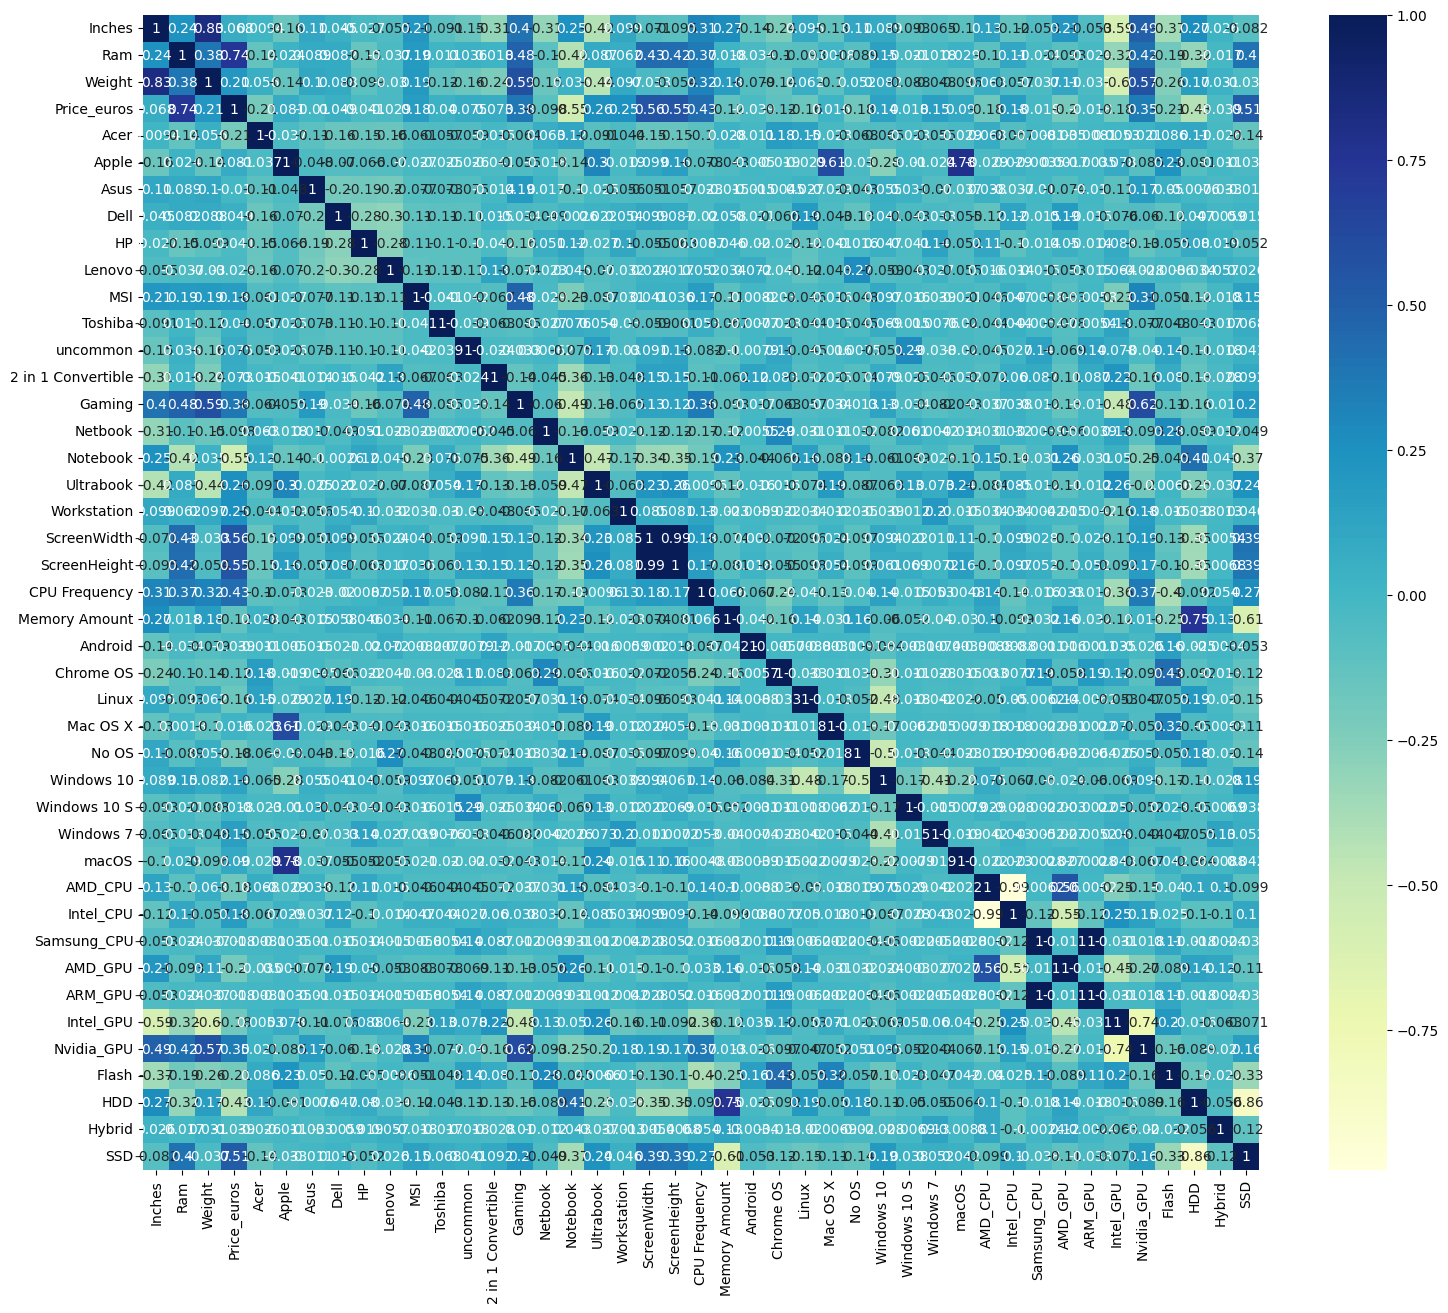

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 15))

# Select numeric columns only for correlation
numeric_df = df.select_dtypes(include=['number'])

sns.heatmap(numeric_df.corr(), annot=True, cmap="YlGnBu")
plt.show()


In [35]:
target_correlations = numeric_df.corr()['Price_euros'].apply(abs).sort_values()

In [36]:
target_correlations

Asus                  0.010376
Mac OS X              0.015656
Windows 10 S          0.018312
Samsung_CPU           0.018431
ARM_GPU               0.018431
Lenovo                0.029007
Android               0.038700
Hybrid                0.039386
Toshiba               0.040339
HP                    0.041291
Dell                  0.048509
Inches                0.068197
2 in 1 Convertible    0.072675
uncommon              0.075249
Apple                 0.080688
macOS                 0.089928
Netbook               0.097572
Chrome OS             0.118684
Memory Amount         0.122365
Windows 10            0.137048
Windows 7             0.152381
Linux                 0.162060
No OS                 0.177094
MSI                   0.180100
AMD_CPU               0.180111
Intel_CPU             0.181127
Intel_GPU             0.184205
AMD_GPU               0.199415
Acer                  0.208349
Weight                0.210370
Flash                 0.210823
Workstation           0.249752
Ultraboo

In [37]:
selected_features = target_correlations[0:].index

In [38]:
selected_features = list(selected_features)

In [39]:
selected_features

['Asus',
 'Mac OS X',
 'Windows 10 S',
 'Samsung_CPU',
 'ARM_GPU',
 'Lenovo',
 'Android',
 'Hybrid',
 'Toshiba',
 'HP',
 'Dell',
 'Inches',
 '2 in 1 Convertible',
 'uncommon',
 'Apple',
 'macOS',
 'Netbook',
 'Chrome OS',
 'Memory Amount',
 'Windows 10',
 'Windows 7',
 'Linux',
 'No OS',
 'MSI',
 'AMD_CPU',
 'Intel_CPU',
 'Intel_GPU',
 'AMD_GPU',
 'Acer',
 'Weight',
 'Flash',
 'Workstation',
 'Ultrabook',
 'Nvidia_GPU',
 'Gaming',
 'HDD',
 'CPU Frequency',
 'SSD',
 'Notebook',
 'ScreenHeight',
 'ScreenWidth',
 'Ram',
 'Price_euros']

In [40]:
limited_df = df[selected_features]

<Axes: >

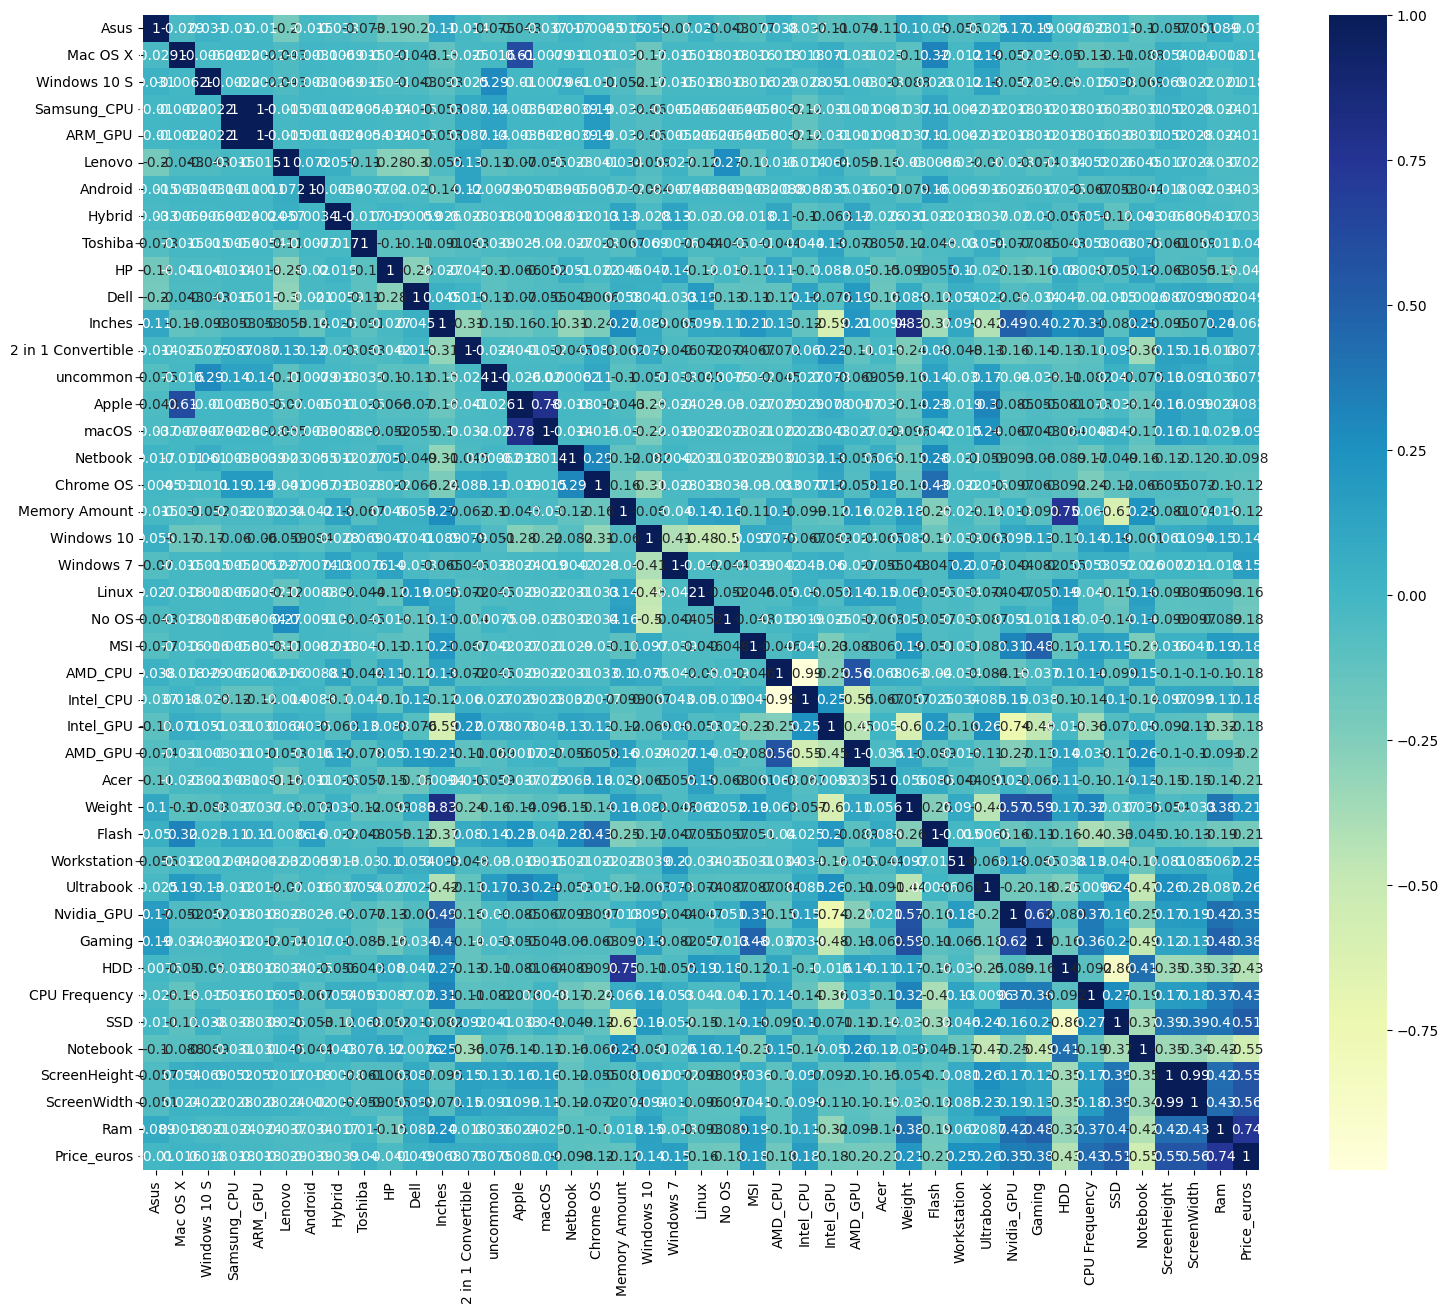

In [41]:
plt.figure(figsize=(18, 15))
sns.heatmap(limited_df.corr(), annot=True, cmap="YlGnBu")

# Model  Training

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X, y = limited_df.drop("Price_euros", axis=1), limited_df["Price_euros"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
forest = RandomForestRegressor()

forest.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [44]:
forest.score(X_test_scaled, y_test)

0.8184144400206788

In [45]:
y_pred = forest.predict(X_test_scaled)

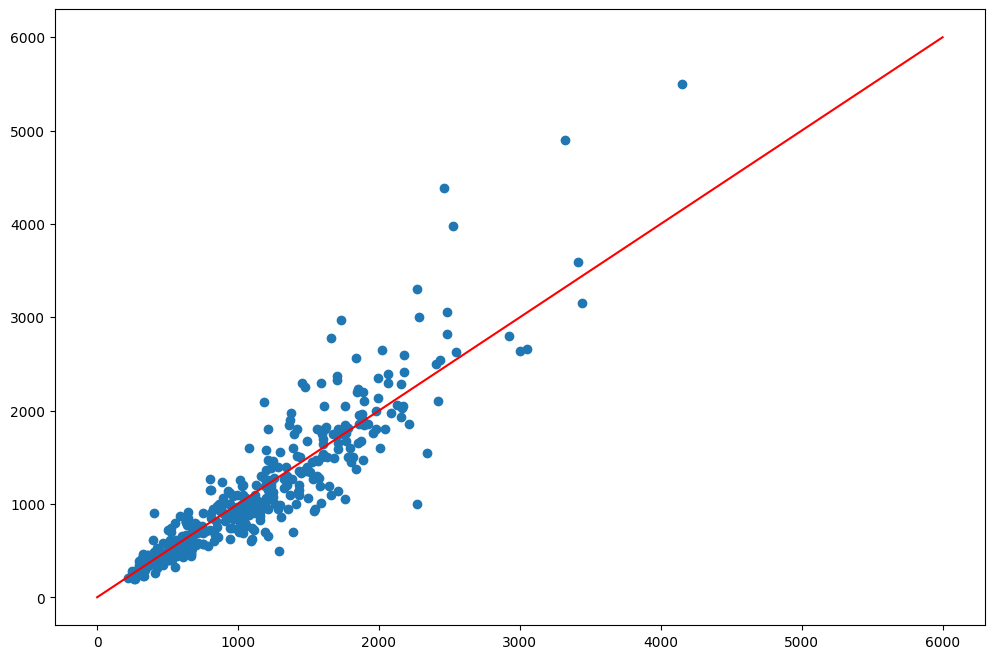

In [46]:
plt.figure(figsize=(12, 8))
plt.scatter(y_pred, y_test)
plt.plot(range(0, 6000), range(0, 6000), c="red")

In [47]:
scores = cross_val_score(forest, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Average score:", scores.mean())

Cross-validation scores: [0.82578864 0.82883327 0.81622354 0.77582873 0.76599834]
Average score: 0.8025345054173583


# Comparing With XGBoost

In [48]:

from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=5,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    n_jobs=-1,
    random_state=42
)

xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)


In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np


def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)


xgb_rmse_scores = -cross_val_score(xgb_model, X_train, y_train, cv=5, scoring=rmse_scorer)
xgb_r2_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='r2')

print("🔷 XGBoost CV RMSE Scores:", xgb_rmse_scores)
print("🔷 XGBoost Average CV RMSE:", xgb_rmse_scores.mean())
print("🔷 XGBoost Average CV R²:", xgb_r2_scores.mean())


rf_rmse_scores = -cross_val_score(forest, X_train, y_train, cv=5, scoring=rmse_scorer)
rf_r2_scores = cross_val_score(forest, X_train, y_train, cv=5, scoring='r2')

print("🟢 Random Forest CV RMSE Scores:", rf_rmse_scores)
print("🟢 Random Forest Average CV RMSE:", rf_rmse_scores.mean())
print("🟢 Random Forest Average CV R²:", rf_r2_scores.mean())


🔷 XGBoost CV RMSE Scores: [314.30756736 285.12742476 229.58003722 353.10517845 314.50787206]
🔷 XGBoost Average CV RMSE: 299.325615969318
🔷 XGBoost Average CV R²: 0.8031079109439497
🟢 Random Forest CV RMSE Scores: [314.00766411 308.60358304 213.82010764 370.17009956 327.00432418]
🟢 Random Forest Average CV RMSE: 306.72115570618297
🟢 Random Forest Average CV R²: 0.7930920316661181


# Clearly XGBoost is More Accurate

In [54]:
def get_user_input():
    print("Enter laptop details for price prediction:\n")

    # Numerical Inputs
    inches = float(input("Screen Size (Inches): "))
    ram = int(input("RAM (GB): "))
    weight = float(input("Weight (kg): "))
    screen_height = int(input("Screen Height (px): "))
    screen_width = int(input("Screen Width (px): "))
    cpu_freq = float(input("CPU Frequency (GHz): "))
    memory_amount = float(input("Memory Size (MB): "))

    # Categories (with Hybrid added to types)
    brands = ['Asus', 'Lenovo', 'Toshiba', 'HP', 'Dell', 'Apple', 'MSI', 'Acer', 'uncommon']
    oss = ['Mac OS X', 'Windows 10 S', 'Android', 'Chrome OS', 'Windows 10', 'Windows 7', 'Linux', 'No OS', 'macOS']
    types = ['2 in 1 Convertible', 'Netbook', 'Notebook', 'Ultrabook', 'Workstation', 'Gaming', 'Hybrid']  # <-- Hybrid here
    cpus = ['Samsung_CPU', 'AMD_CPU', 'Intel_CPU']
    gpus = ['ARM_GPU', 'Intel_GPU', 'AMD_GPU', 'Nvidia_GPU']
    storages = ['Flash', 'HDD', 'SSD']  # Hybrid removed from here

    def one_hot_category(user_input, options, category_name):
        one_hot = []
        user_input = user_input.strip()
        for option in options:
            one_hot.append(1 if user_input == option else 0)
        if sum(one_hot) == 0:
            print(f"Warning: Unknown {category_name} '{user_input}', encoding as all zeros.")
        return one_hot

    brand_input = input(f"Enter Brand {brands}: ")
    brand_vec = one_hot_category(brand_input, brands, "brand")

    os_input = input(f"Enter Operating System {oss}: ")
    os_vec = one_hot_category(os_input, oss, "OS")

    type_input = input(f"Enter Laptop Type {types}: ")
    type_vec = one_hot_category(type_input, types, "laptop type")

    cpu_input = input(f"Enter CPU Brand {cpus}: ")
    cpu_vec = one_hot_category(cpu_input, cpus, "CPU")

    gpu_input = input(f"Enter GPU Brand {gpus}: ")
    gpu_vec = one_hot_category(gpu_input, gpus, "GPU")

    storage_input = input(f"Enter Storage Type {storages}: ")
    storage_vec = one_hot_category(storage_input, storages, "storage")

    feature_vector = []
    feature_vector.extend(brand_vec)
    feature_vector.extend(os_vec)
    feature_vector.extend(type_vec)
    feature_vector.extend(cpu_vec)
    feature_vector.extend(gpu_vec)
    feature_vector.extend(storage_vec)

    feature_vector.extend([inches, ram, weight, screen_height, screen_width, cpu_freq, memory_amount])

    return feature_vector


In [55]:
# Example usage:
user_input = get_user_input()

user_df = pd.DataFrame([user_input])

predicted_price = forest.predict(user_df)

Enter laptop details for price prediction:



Screen Size (Inches):  15.6
RAM (GB):  8
Weight (kg):  1.85
Screen Height (px):  1080
Screen Width (px):  1920
CPU Frequency (GHz):  2.5
Memory Size (MB):  512
Enter Brand ['Asus', 'Lenovo', 'Toshiba', 'HP', 'Dell', 'Apple', 'MSI', 'Acer', 'uncommon']:  Lenovo
Enter Operating System ['Mac OS X', 'Windows 10 S', 'Android', 'Chrome OS', 'Windows 10', 'Windows 7', 'Linux', 'No OS', 'macOS']:  Windows 10
Enter Laptop Type ['2 in 1 Convertible', 'Netbook', 'Notebook', 'Ultrabook', 'Workstation', 'Gaming', 'Hybrid']:  Notebook
Enter CPU Brand ['Samsung_CPU', 'AMD_CPU', 'Intel_CPU']:  Intel_CPU
Enter GPU Brand ['ARM_GPU', 'Intel_GPU', 'AMD_GPU', 'Nvidia_GPU']:  Intel_CPU


Enter Storage Type ['Flash', 'HDD', 'SSD']:  SSD


In [56]:
predicted_price = predicted_price
predicted_price

array([3037.6125])